In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geologist/dataset_geologist.xlsx


In [68]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Data preparation

In [69]:
path = '/kaggle/input/geologist/dataset_geologist.xlsx'
data = pd.read_excel(path, index_col='Unnamed: 0')

In [70]:
new_col_names = ['_'.join(s.split()[1:]) for s in data.columns]
new_col_names[0] = 'num'

In [71]:
data.columns = new_col_names

In [72]:
data.head()

,num,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Latitude,Longitude,Operator_company,...,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,6,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,26.0800,49.8100,SAUDI ARAMCO,...,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
1,10,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,...,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
2,11,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH,9843,NEOGENE,THINLY-BEDDED SANDSTONE,115.0,66.0,22.0,200.0
3,12,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
4,20,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,21.9607,56.0452,PDO,...,OIL,REJUVENATING,SALT,4955,CRETACEOUS,LIMESTONE,250.0,100.0,21.0,60.0


In [73]:
df = data.copy()

In [74]:
df.drop('num', inplace=True, axis=1)
df.dropna(inplace=True)

### What we want to generate?

In [75]:
need_cols = ['Tectonic_regime', 'Region', 'Hydrocarbon_type_(main)', 'Structural_setting', 'Depth_(top_reservoir_ft_TVD)', 'Reservoir_period', 'Lithology_(main)',
       'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)', 'Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)']

### Numerical columns

In [76]:
num_cols = data[need_cols].select_dtypes(exclude='object').dropna()
num_cols.shape

(442, 5)

In [77]:
num_cols.describe()

,Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
count,442.000000,442.000000,442.000000,442.000000,442.000000
mean,6613.658371,784.540724,189.061946,17.929955,469.916425
std,3572.468358,1442.899648,282.161279,7.554253,1017.081304
min,220.000000,11.000000,0.000000,1.100000,0.010000
25%,3824.500000,135.750000,43.000000,12.000000,10.000000
50%,6137.500000,328.000000,100.000000,17.900000,79.500000
75%,9071.500000,748.750000,206.500000,24.000000,400.000000
max,19888.000000,12500.000000,2976.000000,55.000000,7500.000000


### EDA before Discretizing

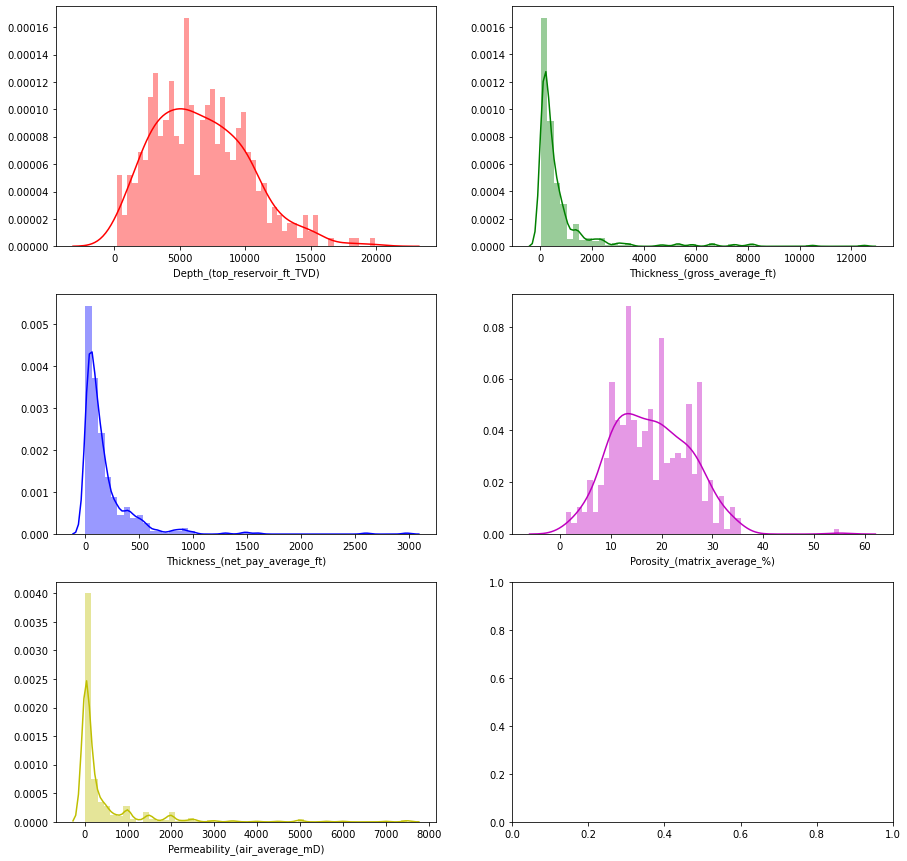

In [78]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.distplot(df['Depth_(top_reservoir_ft_TVD)'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(df['Thickness_(gross_average_ft)'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(df['Thickness_(net_pay_average_ft)'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(df['Porosity_(matrix_average_%)'].dropna(), bins=50, color='m', ax=axes[1, 1])
sns.distplot(df['Permeability_(air_average_mD)'], bins=50, color='y', ax=axes[2, 0])

In [79]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [80]:
distortions = [] 
K = range(3, 20)

for k in K:
    model = KMeans(n_clusters=k).fit(num_cols)
    distortions.append(sum(np.min(cdist(num_cols, model.cluster_centers_, 'euclidean'), axis=1)) / num_cols.shape[0])

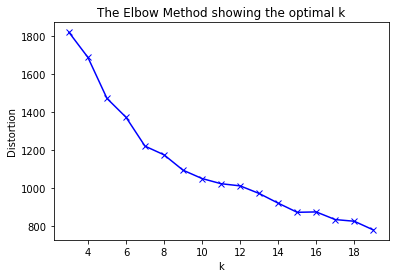

In [81]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

According to distribution plots and clusters we can try to define an optimal n_bins value and stratefy for KBinsDiscretizer.

So optimal n_bins is 9

### Discretization

In [82]:
from sklearn.preprocessing import KBinsDiscretizer

In [183]:
kbins = KBinsDiscretizer(n_bins=9, encode='ordinal', strategy='quantile')
num_cols[num_cols.columns] = kbins.fit_transform(num_cols)
num_cols = num_cols.astype('int')
num_cols.head()

,Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,4,3,5,5,5
1,5,5,5,1,2
2,5,1,3,5,5
3,5,5,5,5,5
4,3,3,4,5,4


### Categorical columns

In [84]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head()

,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Operator_company,Onshore_or_offshore,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Reservoir_period,Lithology_(main)
0,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,JURASSIC,LIMESTONE
1,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,GUPCO,ONSHORE,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,CRETACEOUS,SANDSTONE
2,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,NEOGENE,THINLY-BEDDED SANDSTONE
3,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,NEOGENE,SANDSTONE
4,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,PDO,ONSHORE,OIL,REJUVENATING,SALT,CRETACEOUS,LIMESTONE


### Label encoding

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
if 1:
    le = LabelEncoder()
    for c in cat_cols.columns:
        df[c] = le.fit_transform(cat_cols[c])
    df.head()  

### Combine whole dataset

In [184]:
df_final = df[need_cols]
df_final[num_cols.columns] = num_cols
df_final.head()

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,0,5,5,2,4,5,9,3,5,5,5
1,2,0,3,6,5,3,11,5,5,1,2
2,5,0,2,11,5,7,15,1,3,5,5
3,5,0,2,11,5,7,11,5,5,5,5
4,0,5,5,7,3,3,9,3,4,5,4


In [185]:
df_final.shape

(442, 11)

### Create Bayesian network

In [89]:
#!pip install pgmpy

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


Various code examples

https://github.com/pgmpy/pgmpy/blob/dev/examples/Structure%20Learning%20in%20Bayesian%20Networks.ipynb

https://github.com/pgmpy/pgmpy_notebook/tree/master/notebooks

http://pgmpy.org/estimators.html?highlight=bdeu#base-estimator-classes

In [90]:
from pgmpy.estimators import HillClimbSearch, ExhaustiveSearch, MmhcEstimator
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.sampling import BayesianModelSampling

#### BDeu

To obtain the BDeu score, we need a parameter called equivalent sample size α that expresses the strength of our prior belief in the uniformity of the conditional distributions of the network.  A quick look at the Bayesian network learning literature reveals that there is no generally accepted “uninformative” value for the α parameter.

https://arxiv.org/ftp/arxiv/papers/1206/1206.5293.pdf

In practice, the BDeu score is very sensitive with respect to the equivalent sample size N0 and so, several values are attempted.

**How to find an optimal equivalent_sample_size???**

In [186]:
%%time
bdeu = BDeuScore(df_final, equivalent_sample_size=50)
est = HillClimbSearch(data=df_final, scoring_method=bdeu)
model_bdeu = est.estimate()

CPU times: user 30.2 s, sys: 19 ms, total: 30.3 s
Wall time: 30.3 s


#### K2 score

In [ ]:
k2 = K2Score(df_final)

In [105]:
%%time
est2 = HillClimbSearch(data=df_final, scoring_method=k2)
model2 = est2.estimate(max_iter=int(1e3), max_indegree=4)

CPU times: user 8min 12s, sys: 90.8 ms, total: 8min 12s
Wall time: 8min 13s


In [102]:
import pickle

In [107]:
with open('k2score_1000it_bn.pickle', 'wb') as f:
    pickle.dump(model2, f)

### Draw graph

In [94]:
import networkx as nx

scoring_method = k2

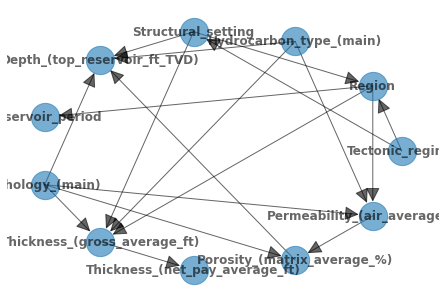

In [101]:
nx.draw_circular(model1, with_labels=True, arrowsize=30, node_size=800, alpha=0.6, font_weight='bold')

scoring_method = bdeu

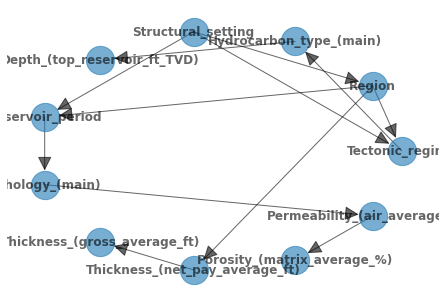

In [187]:
nx.draw_circular(model_bdeu, with_labels=True, arrowsize=30, node_size=800, alpha=0.6, font_weight='bold')

### Sampling

In [121]:
from pgmpy.models import BayesianModel

In [188]:
k2_bm = BayesianModel(model2.edges())
bdeu_bm = BayesianModel(model_bdeu.edges())
k2_bm.fit(df_final)
bdeu_bm.fit(df_final)
k2_samples = BayesianModelSampling(k2_bm).forward_sample(size=442)
bdeu_samples = BayesianModelSampling(bdeu_bm).forward_sample(size=442)
k2_samples.head()

Generating for node: Porosity_(matrix_average_%): 100%|██████████| 11/11 [00:00<00:00, 36.90it/s]  


,Lithology_(main),Hydrocarbon_type_(main),Tectonic_regime,Structural_setting,Region,Permeability_(air_average_mD),Porosity_(matrix_average_%),Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Reservoir_period
0,6,2,0,2,6,1,2,5,3,5,2
1,6,5,2,6,2,0,0,5,5,4,9
2,6,5,3,1,2,2,2,4,2,5,7
3,11,2,0,3,6,0,0,4,5,3,3
4,11,5,2,11,2,3,3,4,5,5,7


### Histograms comparison

In [165]:
def compare(param, source, bdeu_samples, k2_samples, ax):
    final = pd.DataFrame()
    df1 = pd.DataFrame()
    df1[param] = source[param]
    df1['data'] = 'source'
    df1['prob'] = df1[param].apply(lambda x: (df1.groupby(param)[param].count()[x]) / source.shape[0])
    df2 = pd.DataFrame()
    df2[param] = bdeu_samples[param]
    df2['data'] = 'bdeu'
    df2['prob'] = df2[param].apply(lambda x: (df2.groupby(param)[param].count()[x]) / bdeu_samples.shape[0])
    df3 = pd.DataFrame()
    df3[param] = k2_samples[param]
    df3['data'] = 'k2'
    df3['prob'] = df3[param].apply(lambda x: (df3.groupby(param)[param].count()[x]) / k2_samples.shape[0])
    final = pd.concat([df1, df2, df3])
    sns.barplot(x=param, y='prob', hue='data', data=final, ax=ax)
    #plt.show()
    

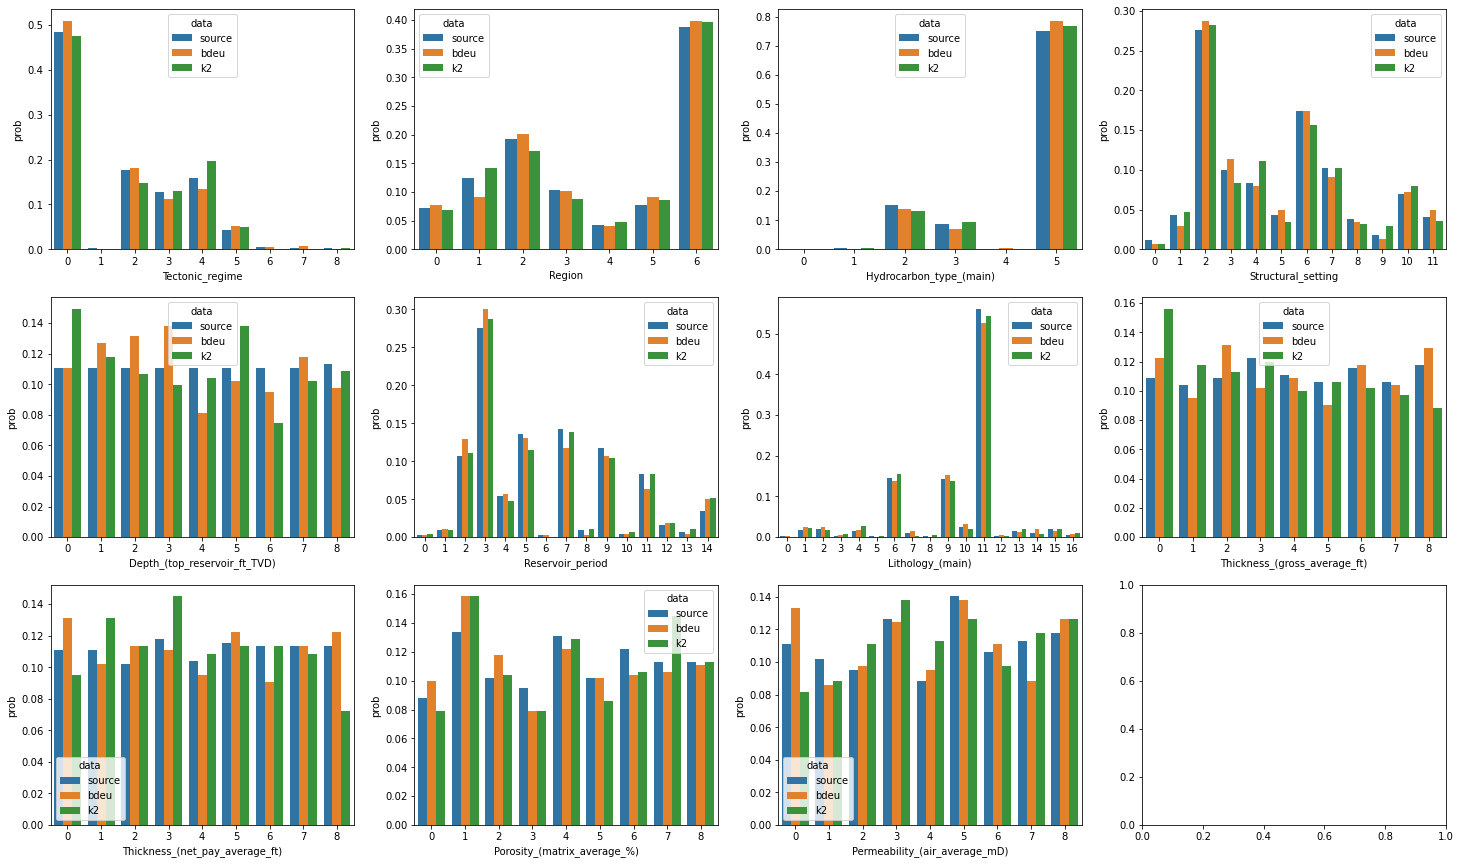

In [172]:
fig, axes = plt.subplots(3, 4, figsize=(25, 15))
for i, c in enumerate(df_final.columns):
    compare(c, df_final, bdeu_samples, k2_samples, axes[i // 4, i % 4])

### SRMSE

TODO:

1. Perform SRMSE evaluation
2. Try to discretize columns one by one and evaluate the score

### Invert discretization and label encoding

In [197]:
cat_cols_to_invert = ['Tectonic_regime', 'Region', 'Hydrocarbon_type_(main)', 'Structural_setting', 'Reservoir_period', 'Lithology_(main)']

In [202]:
def invert_transformations(samples):
    result = samples.copy()
    result[num_cols.columns] = kbins.inverse_transform(samples[num_cols.columns])
    for c in cat_cols_to_invert:
        result[c] = le.inverse_transform(samples[c])
    return result

In [203]:
invert_transformations(bdeu_samples).head()

,Structural_setting,Region,Tectonic_regime,Hydrocarbon_type_(main),Depth_(top_reservoir_ft_TVD),Thickness_(net_pay_average_ft),Thickness_(gross_average_ft),Reservoir_period,Lithology_(main),Permeability_(air_average_mD),Porosity_(matrix_average_%)
0,GLAUCONITIC SANDSTONE,CHALK,CONGLOMERATE,CHALKY LIMESTONE,5.5,5.5,3.5,SANDSTONE,DOLOMITE,2.5,2.5
1,CHERT,DOLOMITE,BASEMENT,CHALKY LIMESTONE,5.5,1.5,0.5,SILTSTONE,SANDSTONE,5.5,5.5
2,CHERT,DOLOMITE,CHALKY LIMESTONE,DIATOMITE,3.5,2.5,3.5,CHALKY LIMESTONE,CONGLOMERATE,3.5,5.5
3,DOLOMITIC LIMESTONE,CHALK,CONGLOMERATE,CHALKY LIMESTONE,5.5,5.5,5.5,DIATOMITE,LIMESTONE,5.5,5.5
4,DOLOMITIC LIMESTONE,DOLOMITE,CHERT,DIATOMITE,4.5,3.5,1.5,DOLOMITIC LIMESTONE,SANDSTONE,5.5,5.5


In [204]:
invert_transformations(k2_samples).head()

,Lithology_(main),Hydrocarbon_type_(main),Tectonic_regime,Structural_setting,Region,Permeability_(air_average_mD),Porosity_(matrix_average_%),Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Reservoir_period
0,DOLOMITE,CHALKY LIMESTONE,BASEMENT,CHALKY LIMESTONE,DOLOMITE,1.5,2.5,5.5,3.5,5.5,CHALKY LIMESTONE
1,DOLOMITE,DIATOMITE,CHALKY LIMESTONE,DOLOMITE,CHALKY LIMESTONE,0.5,0.5,5.5,5.5,4.5,LIMESTONE
2,DOLOMITE,DIATOMITE,CHERT,CHALK,CHALKY LIMESTONE,2.5,2.5,4.5,2.5,5.5,DOLOMITIC LIMESTONE
3,SANDSTONE,CHALKY LIMESTONE,BASEMENT,CHERT,DOLOMITE,0.5,0.5,4.5,5.5,3.5,CHERT
4,SANDSTONE,DIATOMITE,CHALKY LIMESTONE,SANDSTONE,CHALKY LIMESTONE,3.5,3.5,4.5,5.5,5.5,DOLOMITIC LIMESTONE


The next step will be applying anomaly the detection model to this sythetic data

In [205]:
invert_transformations(bdeu_samples).to_csv('bdeu_samples.csv')
invert_transformations(k2_samples).to_csv('k2_samples.csv')

### Other

if all columns were numerical we could probably use GaussianMixture

In [ ]:
from sklearn.mixture import GaussianMixture

In [173]:
if 0:
    n_components = [i for i in range(10, 200, 10)]
    aics = []
    for n in n_components: 
        model = GaussianMixture(n, covariance_type='full', random_state=7)
        aics.append(model.fit(df).aic(df))

    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(n_components, aics)
    ax.grid()
    ax.set_xticks([i for i in range(10, 200, 10)])
    plt.show()